In [1]:
import numpy as np 
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer 

In [2]:
unicorn = pd.read_csv('~/Downloads/UNICORN_COMPANY_2022.CSV')

In [3]:
iunicorn= unicorn

In [4]:
unicorn.head()

,Unnamed: 0,COMPANY,DATE_JOINED,COUNTRY,CITY,INDUSTRY,INVESTOR,VALUATION_IN$B
0,0,ByteDance,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0
1,1,SpaceX,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0
2,2,SHEIN,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0
3,3,Stripe,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0
4,4,Canva,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0


Unicorns are defined as private companies with a valuation of over 1 billion dollars. We will use this dataset to explore the relationships between Unicorns and signfigant data surrouinding it. The total cumulative number of Unicorns are 1,187. this data set contains only 1,177 companies. 

In [5]:
print(unicorn.shape)

(1177, 8)


In [6]:
unicorn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1177.0,588.00000,339.914940,0.0,294.0,588.0,882.0,1176.0
VALUATION_IN$B,1177.0,3.24859,7.664784,1.0,1.1,1.6,3.0,140.0


In [7]:
unicorn.drop(columns= ['Unnamed: 0'], inplace= True)

In [8]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COMPANY         1177 non-null   object 
 1   DATE_JOINED     1177 non-null   object 
 2   COUNTRY         1177 non-null   object 
 3   CITY            1160 non-null   object 
 4   INDUSTRY        1177 non-null   object 
 5   INVESTOR        1176 non-null   object 
 6   VALUATION_IN$B  1177 non-null   float64
dtypes: float64(1), object(6)
memory usage: 64.5+ KB


In [9]:
obj_unicorn = ['COMPANY', 'COUNTRY', 'CITY', 'INDUSTRY', 'INVESTOR']

for colname in obj_unicorn:
    unicorn[colname] = unicorn[colname].astype('category')

print(unicorn.dtypes)

COMPANY           category
DATE_JOINED         object
COUNTRY           category
CITY              category
INDUSTRY          category
INVESTOR          category
VALUATION_IN$B     float64
dtype: object


Here I transformed the object columns into categories

In [10]:
unicorn['DATE_JOINED'] = pd.to_datetime(unicorn['DATE_JOINED'])

unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   COMPANY         1177 non-null   category      
 1   DATE_JOINED     1177 non-null   datetime64[ns]
 2   COUNTRY         1177 non-null   category      
 3   CITY            1160 non-null   category      
 4   INDUSTRY        1177 non-null   category      
 5   INVESTOR        1176 non-null   category      
 6   VALUATION_IN$B  1177 non-null   float64       
dtypes: category(5), datetime64[ns](1), float64(1)
memory usage: 122.9 KB


transformed the sale date into date time d type

In [11]:
unicorn.columns = unicorn.columns.str.lower()
unicorn.columns

Index(['company', 'date_joined', 'country', 'city', 'industry', 'investor',
       'valuation_in$b'],
      dtype='object')

In [12]:
def unicornfunc(x):
    if x > 99.9:  return "Hectocorn"
    elif x > 9.9: return "Decacorn"
    else:        return "Unicorn"

func = np.vectorize(unicornfunc)
unicornclass =func(unicorn['valuation_in$b'])


In [13]:
unicorn['Unicorn Cateogry'] = unicornclass

unicorn

,company,date_joined,country,city,industry,investor,valuation_in$b,Unicorn Cateogry
0,ByteDance,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0,Hectocorn
1,SpaceX,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,Hectocorn
2,SHEIN,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0,Hectocorn
3,Stripe,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0,Decacorn
4,Canva,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,Decacorn
...,...,...,...,...,...,...,...,...
1172,LeadSquared,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",1.0,Unicorn
1173,FourKites,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",1.0,Unicorn
1174,VulcanForms,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",1.0,Unicorn
1175,SingleStore,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",1.0,Unicorn


defined a column based on the named assinged to the scaling of valuation. >= 10B is a Decacorn, >=100B is a Hectocorn

In [14]:
unicorn.isnull().sum()

company              0
date_joined          0
country              0
city                17
industry             0
investor             1
valuation_in$b       0
Unicorn Cateogry     0
dtype: int64

In [15]:
unicorn.isnull().sum()/len(unicorn)*100

company             0.000000
date_joined         0.000000
country             0.000000
city                1.444350
industry            0.000000
investor            0.084962
valuation_in$b      0.000000
Unicorn Cateogry    0.000000
dtype: float64

<AxesSubplot:>

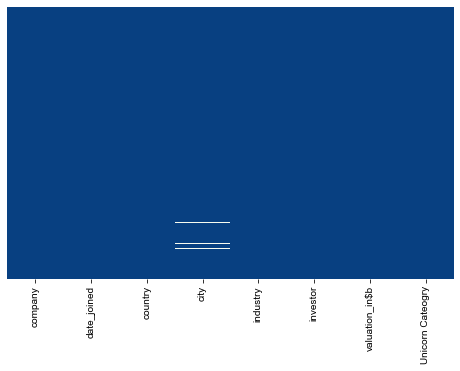

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
sns.set(font_scale=1)
sns.heatmap(unicorn.isnull(),yticklabels = False, cbar= False, cmap = 'GnBu_r')

Data inegrity and connsistency seem to be in good shape. 1.44% of the city entries seem to be missing. 

In [17]:
unicorn.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
valuation_in$b,1177.00000,3.24859,7.66478,1.00000,1.10000,1.60000,3.00000,140.00000


In [18]:
ucompcount = unicorn['company'].value_counts()
print(ucompcount)

0x                       1
Phantom                  1
Poizon                   1
PointClickCare           1
Podium                   1
                        ..
Getir                    1
GetYourGuide             1
Genies                   1
Generate Biomedicines    1
wefox                    1
Name: company, Length: 1177, dtype: int64


In [19]:
##unicorn['country'].value_counts().plot(kind='bar') 
ucountrycount=unicorn['country'].value_counts() 
print(ucountrycount) 

United States           630
China                   174
India                    69
United Kingdom           46
Germany                  29
France                   23
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Mexico                    8
Australia                 8
Sweden                    8
Hong Kong                 7
Indonesia                 7
Netherlands               7
Japan                     6
Ireland                   6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
United Arab Emirates      3
Colombia                  3
Belgium                   3
Turkey                    3
Philippines               2
Vietnam                   2
Lithuania                 2
Thailand                  2
Denmark                   2
Croatia                   2
Chile                     2
Austria                   2
South Africa        

The united states has over 630 unicorns, China with over 170 unicorns, and india with 69 unicorns.

<AxesSubplot:>

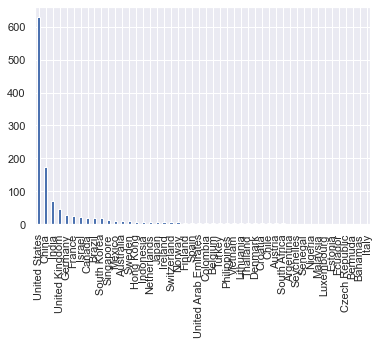

In [20]:
unicorn['country'].value_counts().plot(kind='bar') 


In [21]:
countrykeys = len(Counter(unicorn['country']).keys())
print(countrykeys)

48


48 differen countries with unicorns 

In [22]:
industrykeys = len(Counter(unicorn['industry']).keys())
print(industrykeys)

17


covering 16 different industries

In [23]:
citykeys= len(Counter(unicorn['city']).keys())
print(citykeys)

280


280 different cities

1122 unicorns
  52 decacorns
   3 hectocorn

<AxesSubplot:>

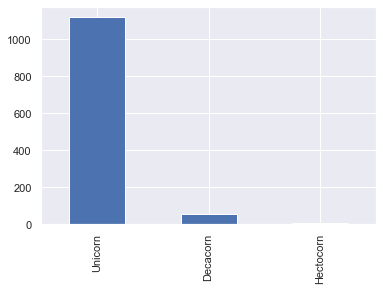

In [24]:
unicorn['Unicorn Cateogry'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='industry', ylabel='valuation_in$b'>

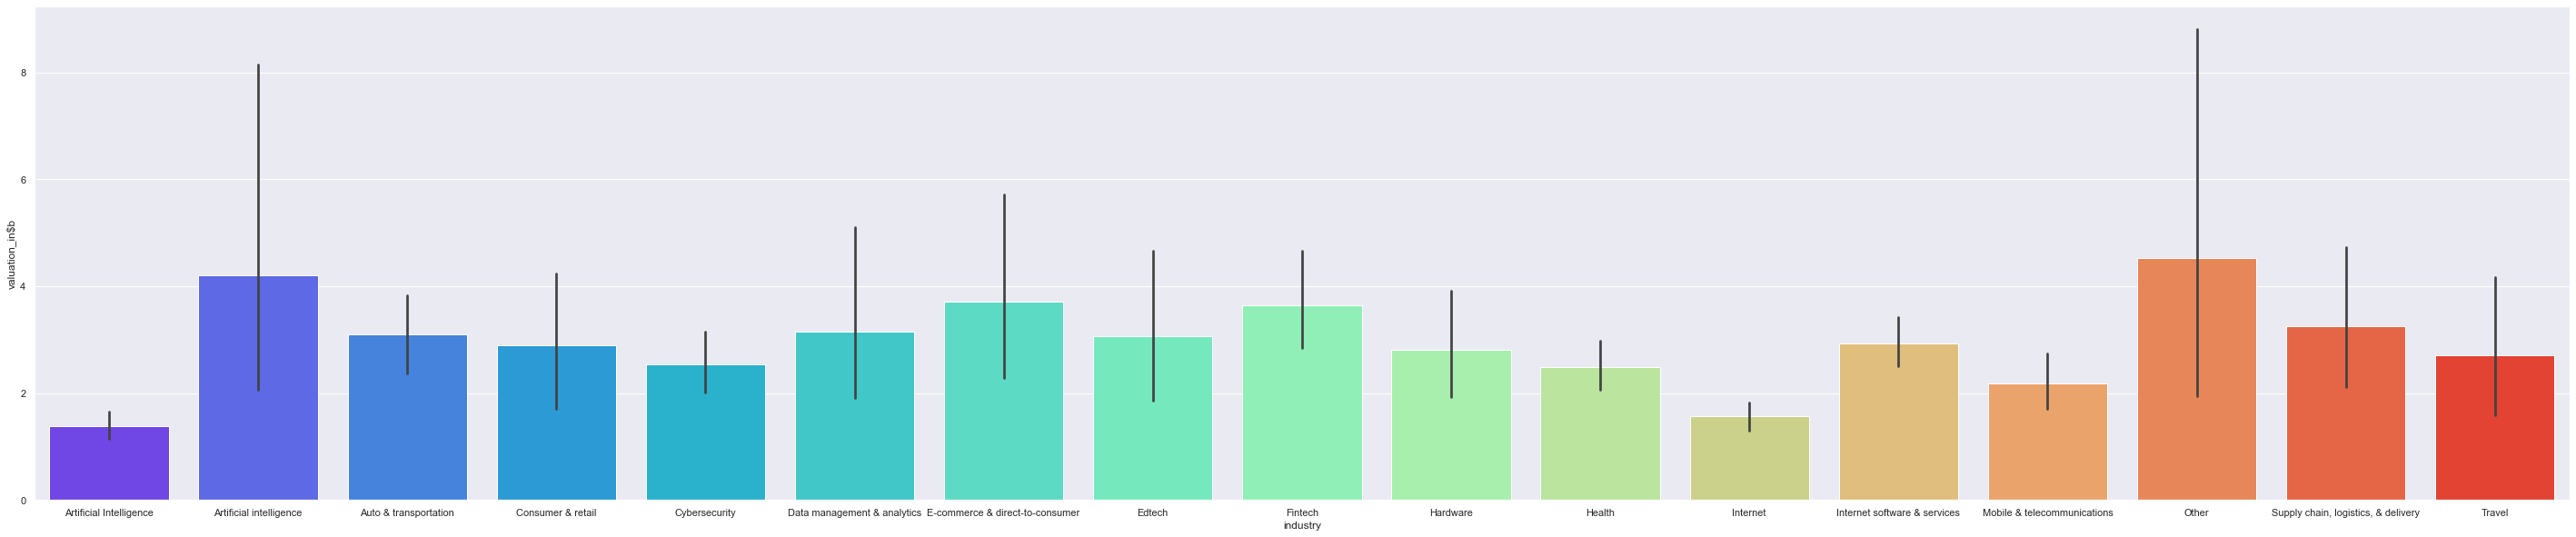

In [25]:
plt.figure(figsize=(50,10))

sns.barplot(x ='industry', y = 'valuation_in$b', data = unicorn, palette='rainbow')

<AxesSubplot:xlabel='valuation_in$b', ylabel='country'>

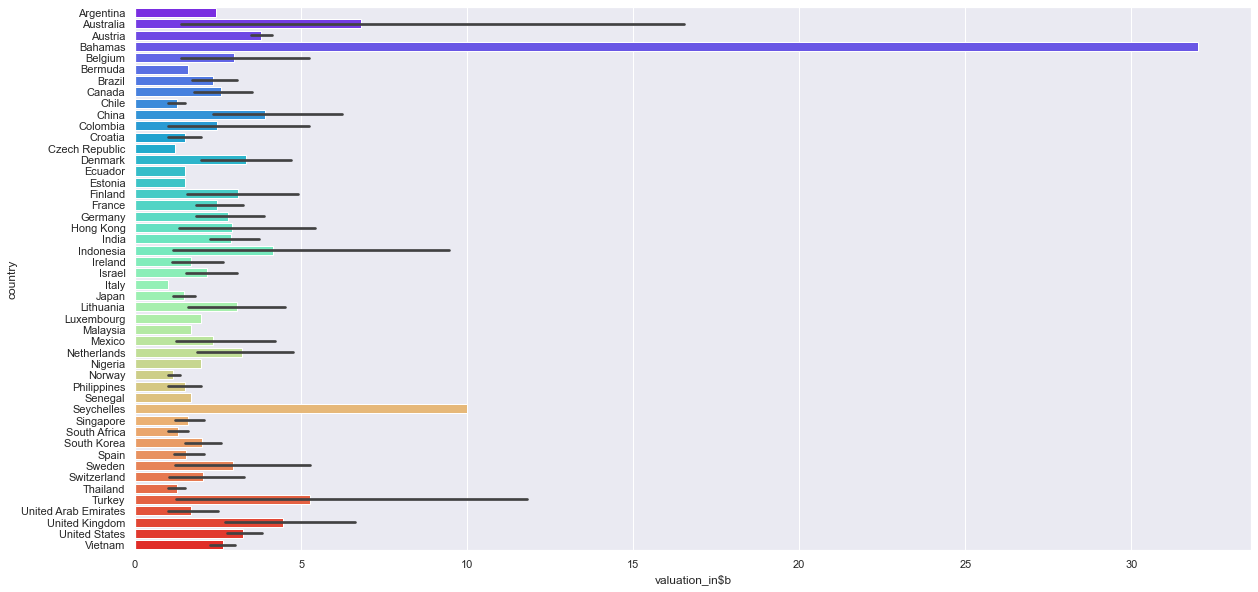

In [26]:
plt.figure(figsize=(20,10))

sns.barplot(x = 'valuation_in$b', y = 'country', data = unicorn, palette='rainbow')

the country with the highest valuation in billions is the bahamas and seychelles

In [27]:
unicorn['industry']

0                   Artificial intelligence
1                                     Other
2           E-commerce & direct-to-consumer
3                                   Fintech
4              Internet software & services
                       ...                 
1172           Internet software & services
1173    Supply chain, logistics, & delivery
1174    Supply chain, logistics, & delivery
1175            Data management & analytics
1176           Internet software & services
Name: industry, Length: 1177, dtype: category
Categories (17, object): ['Artificial Intelligence', 'Artificial intelligence', 'Auto & transportation', 'Consumer & retail', ..., 'Mobile & telecommunications', 'Other', 'Supply chain, logistics, & delivery', 'Travel']

In [28]:
unicorn.columns = map(str.lower, unicorn.columns)

In [29]:
unicorn['industry'].str.replace("Artificial Intelligence","AI")
unicorn['industry'].str.replace("Artificial intelligence","AI")

0                                        AI
1                                     Other
2           E-commerce & direct-to-consumer
3                                   Fintech
4              Internet software & services
                       ...                 
1172           Internet software & services
1173    Supply chain, logistics, & delivery
1174    Supply chain, logistics, & delivery
1175            Data management & analytics
1176           Internet software & services
Name: industry, Length: 1177, dtype: object

In [30]:
unicorn.to_csv('unicornsV1.csv')

In [31]:
totalvb = unicorn['valuation_in$b'].sum()
print(totalvb)

3823.59


In [32]:
uindustry = len(Counter(unicorn['industry']).keys())
print(industrykeys)

17


<AxesSubplot:xlabel='industry', ylabel='valuation_in$b'>

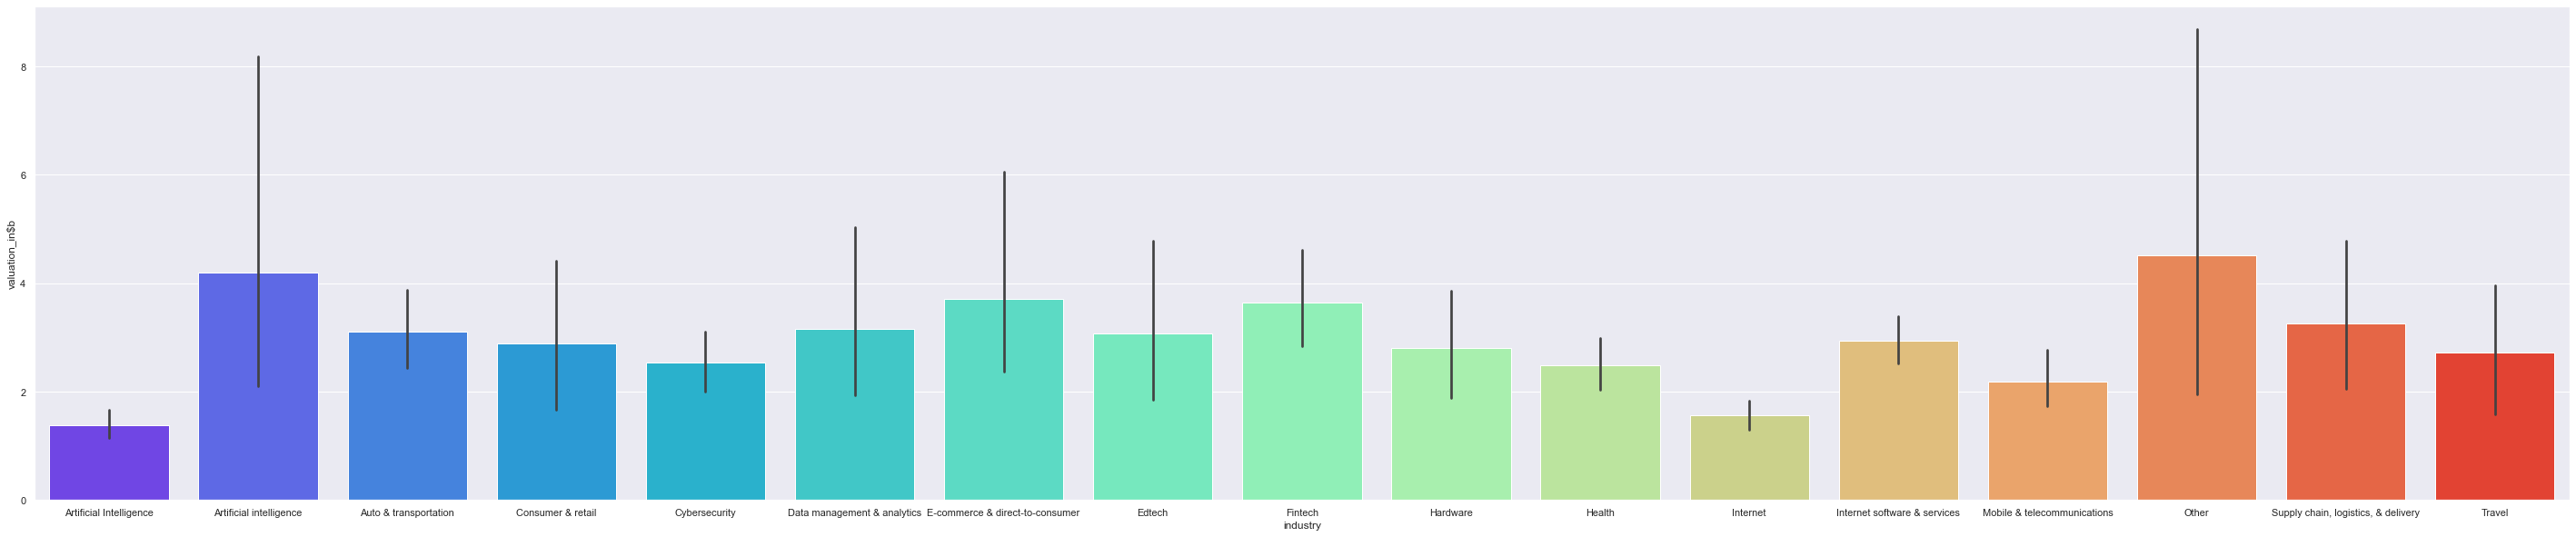

In [33]:
plt.figure(figsize=(50,10))

sns.barplot(x ='industry', y = 'valuation_in$b', data = unicorn, palette='rainbow')

In [34]:
unicorn['industry'].unique()

['Artificial intelligence', 'Other', 'E-commerce & direct-to-consumer', 'Fintech', 'Internet software & services', ..., 'Cybersecurity', 'Mobile & telecommunications', 'Travel', 'Artificial Intelligence', 'Internet']
Length: 17
Categories (17, object): ['Artificial Intelligence', 'Artificial intelligence', 'Auto & transportation', 'Consumer & retail', ..., 'Mobile & telecommunications', 'Other', 'Supply chain, logistics, & delivery', 'Travel']

In [35]:
unicorn['industry'].value_counts().reset_index()

,index,industry
0,Fintech,242
1,Internet software & services,226
2,E-commerce & direct-to-consumer,105
3,Health,94
4,Artificial intelligence,76
5,Other,65
6,"Supply chain, logistics, & delivery",65
7,Cybersecurity,58
8,Data management & analytics,45
9,Auto & transportation,39


In [36]:
unicorn['industry'].replace(['Artificial intelligence'], 'AI', inplace=True)
unicorn['industry'].replace(['Artificial Intelligence'], 'AI', inplace=True)


the industry column contained two different column names for the same industry. i have combined them. 

In [37]:
unicorn['industry'].value_counts().reset_index()

,index,industry
0,Fintech,242
1,Internet software & services,226
2,E-commerce & direct-to-consumer,105
3,Health,94
4,AI,87
5,Other,65
6,"Supply chain, logistics, & delivery",65
7,Cybersecurity,58
8,Data management & analytics,45
9,Auto & transportation,39


<AxesSubplot:xlabel='valuation_in$b', ylabel='industry'>

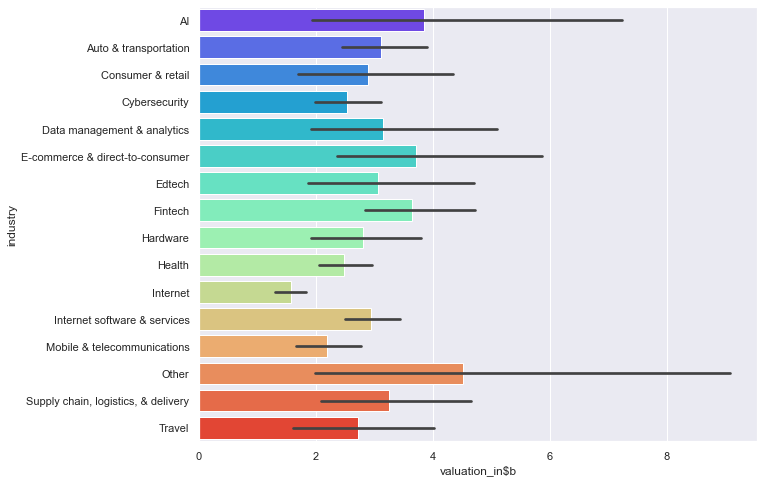

In [38]:
plt.figure(figsize=(10,8))

sns.barplot(x ='valuation_in$b', y ='industry', data = unicorn, palette='rainbow')

In [39]:
unicorn['valuation_in$b'].value_counts()

1.00    270
2.00     73
1.50     59
1.10     44
1.20     40
       ... 
4.90      1
4.73      1
5.85      1
4.53      1
1.06      1
Name: valuation_in$b, Length: 220, dtype: int64

In [40]:
unicorn['date_joined'].value_counts()

2021-07-13    9
2021-09-15    7
2022-02-22    7
2021-11-10    7
2021-10-28    6
             ..
2020-01-03    1
2019-09-30    1
2019-06-25    1
2022-02-11    1
2022-07-27    1
Name: date_joined, Length: 691, dtype: int64

In [41]:
unicorn.loc[(unicorn['date_joined'] < '2020-01-01') ]

,company,date_joined,country,city,industry,investor,valuation_in$b,unicorn cateogry
0,ByteDance,2017-04-07,China,Beijing,AI,"Sequoia Capital China, SIG Asia Investments, S...",140.0,Hectocorn
1,SpaceX,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,Hectocorn
2,SHEIN,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0,Hectocorn
3,Stripe,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0,Decacorn
4,Canva,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,Decacorn
...,...,...,...,...,...,...,...,...
963,Ibotta,2019-08-06,United States,Denver,Fintech,"Koch Disruptive Technologies, Teamworthy Ventu...",1.0,Unicorn
964,C2FO,2019-08-07,United States,Leawood,Fintech,"Union Square Ventures, Summerhill Venture Part...",1.0,Unicorn
965,Numbrs,2019-08-22,Switzerland,Zurich,Fintech,"Investment Corporation of Dubai, Centralway",1.0,Unicorn
966,EBANX,2019-10-16,Brazil,Curitiba,Fintech,"FTV Capital, Endeavor",1.0,Unicorn


make column for date joined by year value. 

In [42]:
def datefunc(x):
    if x < '2020-01-01': return "before 2020"
    else: return "after 2020"

funcs = (datefunc)
datefuncs = funcs(unicorn['date_joined'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:>

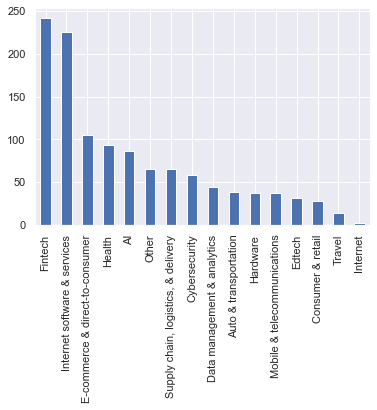

In [ ]:
unicorn['industry'].value_counts().plot(kind='bar')

a majority of the industries of the unicorns are fintech and internet software and services. 

In [ ]:
unicorn['date_category'] = np.where(unicorn['date_joined'] > '2020-01-01', 'Post_2020','Pre_2020' )

unicorn['date_category'] = unicorn['date_category'].astype('category')

unicorn


,company,date_joined,country,city,industry,investor,valuation_in$b,unicorn cateogry,date_category
0,ByteDance,2017-04-07,China,Beijing,AI,"Sequoia Capital China, SIG Asia Investments, S...",140.0,Hectocorn,Pre_2020
1,SpaceX,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,Hectocorn,Pre_2020
2,SHEIN,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0,Hectocorn,Pre_2020
3,Stripe,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0,Decacorn,Pre_2020
4,Canva,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,Decacorn,Pre_2020
...,...,...,...,...,...,...,...,...,...
1172,LeadSquared,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",1.0,Unicorn,Post_2020
1173,FourKites,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",1.0,Unicorn,Post_2020
1174,VulcanForms,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",1.0,Unicorn,Post_2020
1175,SingleStore,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",1.0,Unicorn,Post_2020


<AxesSubplot:>

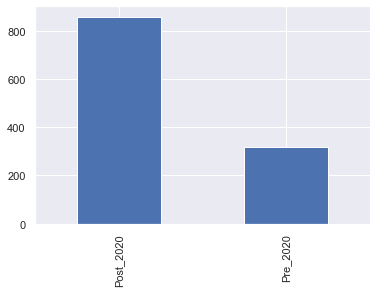

In [ ]:
unicorn['date_category'].value_counts().plot(kind='bar')

a 

In [ ]:
unicorn[unicorn['industry']== 'Other']

,company,date_joined,country,city,industry,investor,valuation_in$b,unicorn cateogry,date_category
1,SpaceX,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.00,Hectocorn,Pre_2020
9,Epic Games,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",31.50,Decacorn,Pre_2020
57,HEYTEA,2019-07-01,China,Shenzhen,Other,"Sequoia Capital China, Tencent Investment, BA ...",9.28,Unicorn,Pre_2020
60,Northvolt,2019-06-12,Sweden,Stockholm,Other,"Vattenfall, Volkswagen Group, Goldman Sachs",9.08,Unicorn,Pre_2020
107,Black Unicorn Factory,2021-05-20,United States,Los Angeles,Other,Barter Ventures,6.10,Unicorn,Post_2020
...,...,...,...,...,...,...,...,...,...
1018,Printful,2021-05-24,United States,Charlotte,Other,Bregal Sagemount,1.00,Unicorn,Post_2020
1095,Mensa Brands,2021-11-16,India,Bengaluru,Other,"Accel, Falcon Edge Capital, Norwest Venture Pa...",1.00,Unicorn,Post_2020
1119,InFarm,2021-12-16,Germany,Berlin,Other,"Atomico, Hanaco Venture Capital, TriplePoint C...",1.00,Unicorn,Post_2020
1159,UPSIDE Foods,2022-04-21,United States,Berkeley,Other,"Battery Ventures, Adams Street Partners, Coatu...",1.00,Unicorn,Post_2020


In [ ]:
unicorn[unicorn['industry']== 'Internet']

,company,date_joined,country,city,industry,investor,valuation_in$b,unicorn cateogry,date_category
521,MEGAZONE,2022-08-16,South Korea,Seoul,Internet,"Salesforce Ventures, ATP Investment, kt invest...",1.83,Unicorn,Post_2020
723,Shiprocket,2022-08-16,India,New Delhi,Internet,"Bertelsmann India Investments, March Capital P...",1.30,Unicorn,Post_2020


In [ ]:
unicorn[unicorn['industry']== 'Travel']

,company,date_joined,country,city,industry,investor,valuation_in$b,unicorn cateogry,date_category
63,OYO Rooms,2018-09-25,India,Gurugram,Travel,"SoftBank Group, Sequoia Capital India,Lightspe...",9.00,Unicorn,Pre_2020
90,TripActions,2018-11-08,United States,Palo Alto,Travel,"Andreessen Horowitz, Lightspeed Venture Partne...",7.25,Unicorn,Pre_2020
150,Hopper,2021-03-24,Canada,Montreal,Travel,"Capital One Growth Ventures, Citi Ventures, OM...",5.00,Unicorn,Post_2020
282,Traveloka,2017-01-01,Indonesia,Jakarta,Travel,"Global Founders Capital, East Ventures, Expedi...",3.00,Unicorn,Pre_2020
443,Mafengwo,2019-05-23,China,Beijing,Travel,"Qiming Venture Partners, Capital Today, Genera...",2.00,Unicorn,Pre_2020
481,Tier,2021-10-25,Germany,Berlin,Travel,"Northzone Ventures, White Star Capital, Novato...",2.00,Unicorn,Post_2020
602,TuJia,2015-06-17,China,Beijing,Travel,"GGV Capital, QiMing Venture Partnersl",1.50,Unicorn,Pre_2020
607,XiaoZhu,2017-11-01,China,Beijing,Travel,"Morningside Ventures, Capital Today, JOY Capital",1.50,Unicorn,Pre_2020
708,Klook,2018-08-07,Hong Kong,Central,Travel,"Sequoia Capital China, Goldman Sachs, Matrix P...",1.35,Unicorn,Pre_2020
735,TravelPerk,2022-01-12,Spain,Barcelona,Travel,"LocalGlobe, Kinnevik, Felix Capital",1.30,Unicorn,Post_2020


In [ ]:
unicorn[unicorn['unicorn cateogry']== 'Decacorn']

,company,date_joined,country,city,industry,investor,valuation_in$b,unicorn cateogry,date_category
3,Stripe,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.00,Decacorn,Pre_2020
4,Canva,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.00,Decacorn,Pre_2020
5,Checkout.com,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",40.00,Decacorn,Pre_2020
6,Instacart,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",39.00,Decacorn,Pre_2020
7,Databricks,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",38.00,Decacorn,Pre_2020
8,Revolut,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",33.00,Decacorn,Pre_2020
9,Epic Games,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",31.50,Decacorn,Pre_2020
10,FTX,2021-07-20,Bahamas,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",32.00,Decacorn,Post_2020
11,Fanatics,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",27.00,Decacorn,Pre_2020
12,Chime,2019-03-05,United States,San Francisco,Fintech,"Forerunner Ventures, Crosslink Capital, Homebrew",25.00,Decacorn,Pre_2020


<AxesSubplot:xlabel='valuation_in$b', ylabel='industry'>

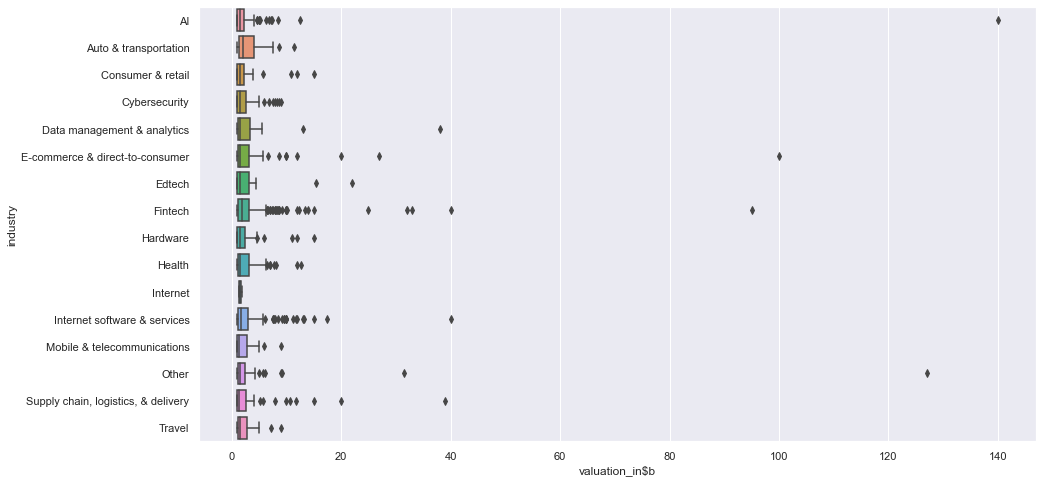

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=unicorn, x ='valuation_in$b', y ='industry')

<Figure size 2160x1080 with 0 Axes>

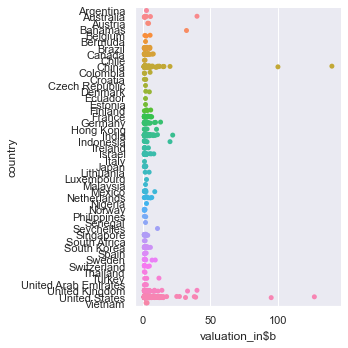

In [ ]:
plt.figure(figsize=(30,15))
sns.catplot(data=unicorn, x ='valuation_in$b', y ='country')